# Prediction of text with Nexa. Letter Latency.
This notbook is for seeing how much the delay between the code vector and the code is related to the accuaracy of the prediciton.

In [1]:
import numpy as np
import h5py
from sklearn import svm, cross_validation
from sklearn.naive_bayes import MultinomialNB

### Load the data

In [3]:
# First we load the file 
file_location = '../results_database/text_wall_street_big.hdf5'
f = h5py.File(file_location, 'r')

# Now we need to get the letters and align them
text_directory = '../data/wall_street_letters.npy'
letters_sequence = np.load(text_directory)
Nletters = len(letters_sequence)
symbols = set(letters_sequence)

# Load the particular example
Nspatial_clusters = 5
Ntime_clusters = 15
Nembedding = 3

run_name = '/low-resolution'
parameters_string = '/' + str(Nspatial_clusters)
parameters_string += '-' + str(Ntime_clusters)
parameters_string += '-' + str(Nembedding)

nexa = f[run_name + parameters_string]

# Now we load the time and the code vectors
time = nexa['time']
code_vectors = nexa['code-vectors']
code_vectors_distance = nexa['code-vectors-distance']
code_vectors_softmax = nexa['code-vectors-softmax']
code_vectors_winner = nexa['code-vectors-winner']

### Make the predictions


In [4]:
delays = np.arange(0, 20)
accuaracy = []

Make the prediction for each delay. This **takes a bit**

In [6]:
N = 50000  # Amount of data
delays = np.arange(0, 10)
accuaracy = []

# Make prediction with scikit-learn
for delay in delays:
    X = code_vectors_winner[:(N - delay)]
    y = letters_sequence[delay:N]
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)

    clf = svm.SVC(C=1.0, cache_size=200, kernel='linear')
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test) * 100.0
    accuaracy.append(score)



delay 0
SVM score 24.88
delay 1
SVM score 60.38
delay 2
SVM score 64.86
delay 3
SVM score 70.88
delay 4
SVM score 70.32
delay 5
SVM score 86.32
delay 6
SVM score 28.66
delay 7
SVM score 19.34
delay 8
SVM score 18.76
delay 9
SVM score 17.98


# Plot it

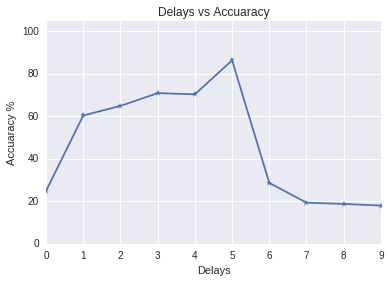

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(delays, accuaracy, '*-')
plt.xlabel('Delays')
plt.ylim([0, 105])
plt.ylabel('Accuaracy %')
plt.title('Delays vs Accuaracy')